# Requirements

In [ ]:
import pandas as pd
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_absolute_error

## Introduction
In this laboratory assignment, the focus is on time series forecasting, specifically targeting the prediction of the current **close price** for the Amazon stock. To accomplish this, you will use data from the preceding 7 days, and past statistics. 


## The Amazon Stock Price Dataset

The dataset comprises the following columns:
- date - the date of the recorded price
- open - the open price of the stock
- high - the high price of the stock
- low - the low price of the stock
- volume - the volume trades
- close - the close price of the stock

Target:
close

Load the dataset into a `pandas` data frame.

In [131]:
df = pd.read_csv("./content/amazon_stock_price.csv")
df = df.set_index('date')

Explore the dataset using visualizations of your choice.

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6685 entries, 1997-05-15 to 2023-12-06
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    6685 non-null   float64
 1   high    6685 non-null   float64
 2   low     6685 non-null   float64
 3   close   6685 non-null   float64
 4   volume  6685 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 313.4+ KB


# Feauture Extraction
Select the relevant features for prediction and apply a lag of up to 7 days to each chosen feature

Hint: Use `df['column_name'].shift(period)`. Check the documentation at https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shift.html.

In [133]:
lag = 7 
for i in range(1, lag+1):
    df[f'close_prev_{i}'] = df['close'].shift(i)

In [134]:
df = df.dropna(axis=0)
df.head()

,open,high,low,close,volume,close_prev_1,close_prev_2,close_prev_3,close_prev_4,close_prev_5,close_prev_6,close_prev_7
date,,,,,,,,,,,,
1997-05-27,0.0755,0.0823,0.0729,0.0792,173952000,0.0750,0.0698,0.0714,0.0818,0.0854,0.0865,0.0979
1997-05-28,0.0812,0.0818,0.0766,0.0766,91488000,0.0792,0.0750,0.0698,0.0714,0.0818,0.0854,0.0865
1997-05-29,0.0771,0.0771,0.0740,0.0753,69456000,0.0766,0.0792,0.0750,0.0698,0.0714,0.0818,0.0854
1997-05-30,0.0750,0.0755,0.0740,0.0750,51888000,0.0753,0.0766,0.0792,0.0750,0.0698,0.0714,0.0818
1997-06-02,0.0755,0.0766,0.0750,0.0755,11832000,0.0750,0.0753,0.0766,0.0792,0.0750,0.0698,0.0714


In [135]:
features = [f'close_prev_{i}' for i in range(1, lag + 1)]

X,Y = df[features], df['close']

In [136]:
X

,close_prev_1,close_prev_2,close_prev_3,close_prev_4,close_prev_5,close_prev_6,close_prev_7
date,,,,,,,
1997-05-27,0.0750,0.0698,0.0714,0.0818,0.0854,0.0865,0.0979
1997-05-28,0.0792,0.0750,0.0698,0.0714,0.0818,0.0854,0.0865
1997-05-29,0.0766,0.0792,0.0750,0.0698,0.0714,0.0818,0.0854
1997-05-30,0.0753,0.0766,0.0792,0.0750,0.0698,0.0714,0.0818
1997-06-02,0.0750,0.0753,0.0766,0.0792,0.0750,0.0698,0.0714
...,...,...,...,...,...,...,...
2023-11-30,146.3200,147.0300,147.7300,146.7400,146.7100,143.9000,146.1300
2023-12-01,146.0900,146.3200,147.0300,147.7300,146.7400,146.7100,143.9000
2023-12-04,147.0300,146.0900,146.3200,147.0300,147.7300,146.7400,146.7100


## Dataset Splitting
Partition the dataset into training and testing sets with an 80:20 ratio.

**WARNING: DO NOT SHUFFLE THE DATASET.**



In [137]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=False)

## Ensemble Learning Methods

### Bagging

Create an instance of a Random Forest model and train it using the `fit` function.

In [138]:
model1 = RandomForestRegressor()
model1.fit(X_train, Y_train)

RandomForestRegressor()

Use the trained model to make predictions for the test set.

In [139]:
y_pred = model1.predict(X_test)

Assess the performance of the model by using different metrics provided by the `scikit-learn` library.

In [140]:
print(r2_score(Y_test,y_pred))

-0.8210096189359273


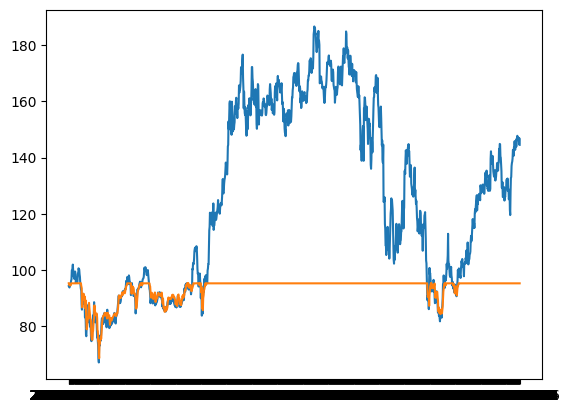

In [141]:
import matplotlib.pyplot as plt
plt.plot(Y_test)
plt.plot(y_pred)

### Boosting

Create an instance of an XGBoost model and train it using the `fit` function.

In [142]:
model2 = XGBRegressor()
model2.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Use the trained model to make predictions for the test set.

In [ ]:
y_pred = model1.predict(X_test)

Assess the performance of the model by using different metrics provided by the `scikit-learn` library.

In [144]:
print(r2_score(Y_test,y_pred))

-0.8210096189359273


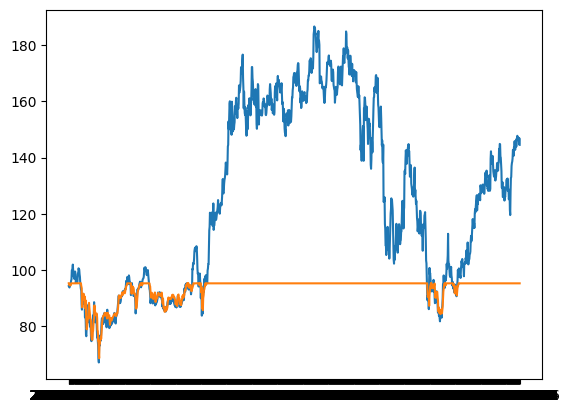

In [145]:
plt.plot(Y_test)
plt.plot(y_pred)

In [149]:
model3 = XGBRegressor()
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'subsample': [0.5, 0.7, 1]
}
ts = TimeSeriesSplit(n_splits=5)
grid_search = GridSearchCV(model3,param_grid,cv=ts,scoring='neg_mean_absolute_error')
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, imp...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [3, 5, 7], 'subsample': [0.5, 0.7, 1]},
             scoring='neg_mean_absolute_error')

In [150]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'learning_rate': 0.1, 'max_depth': 3, 'subsample': 1}
-5.788193880154772


In [153]:
y_pred = grid_search.best_estimator_.predict(X_test)
print(r2_score(Y_test,y_pred))

-1.005885402734279
